In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = yf.download("JPM", start="2010-01-01", end="2024-03-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,41.790001,42.990002,41.669998,42.849998,29.497763,35460500
2010-01-05,42.790001,43.840000,42.779999,43.680000,30.069147,41208300
2010-01-06,43.450001,44.090000,43.310001,43.919998,30.234369,27729000
2010-01-07,43.790001,45.119999,43.610001,44.790001,30.833269,44864700
2010-01-08,44.369999,44.700001,44.080002,44.680000,30.757544,33110100
...,...,...,...,...,...,...
2024-03-22,199.009995,200.479996,196.539993,196.619995,195.479736,8105800
2024-03-25,196.600006,196.940002,194.360001,194.820007,193.690186,8620000
2024-03-26,194.589996,196.660004,194.059998,195.729996,194.594894,5961500


In [5]:
data["Returns"] = data["Close"].pct_change()
data

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2010-01-04,41.790001,42.990002,41.669998,42.849998,29.497763,35460500,NaN
2010-01-05,42.790001,43.840000,42.779999,43.680000,30.069147,41208300,0.019370
2010-01-06,43.450001,44.090000,43.310001,43.919998,30.234369,27729000,0.005494
2010-01-07,43.790001,45.119999,43.610001,44.790001,30.833269,44864700,0.019809
2010-01-08,44.369999,44.700001,44.080002,44.680000,30.757544,33110100,-0.002456
...,...,...,...,...,...,...,...
2024-03-22,199.009995,200.479996,196.539993,196.619995,195.479736,8105800,-0.012258
2024-03-25,196.600006,196.940002,194.360001,194.820007,193.690186,8620000,-0.009155
2024-03-26,194.589996,196.660004,194.059998,195.729996,194.594894,5961500,0.004671


Calculate VaR

In [6]:
confidence_level = 0.95
var = -np.percentile(data["Returns"].dropna(), (1 - confidence_level) * 100)

(array([ 0.04232807,  0.        ,  0.04232807,  0.        ,  0.        ,
         0.        ,  0.04232807,  0.        ,  0.08465613,  0.        ,
         0.08465613,  0.08465613,  0.08465613,  0.16931226,  0.42328066,
         0.71957711,  1.31217003,  1.94709102,  3.97883816,  6.73016243,
        11.64021803, 22.43387475, 33.73546826, 28.57144426, 18.03175593,
         9.98942347,  4.86772754,  3.04762072,  1.18518584,  0.76190518,
         0.46560872,  0.38095259,  0.1269842 ,  0.21164033,  0.08465613,
         0.1269842 ,  0.08465613,  0.        ,  0.        ,  0.        ,
         0.04232807,  0.        ,  0.        ,  0.04232807,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.04232807]),
 array([-0.14964876, -0.14305328, -0.13645781, -0.12986234, -0.12326686,
        -0.11667139, -0.11007592, -0.10348044, -0.09688497, -0.09028949,
        -0.08369402, -0.07709855, -0.07050307, -0.0639076 , -0.05731213,
        -0.05071665, -0.04412118, -0.0375257 , -0

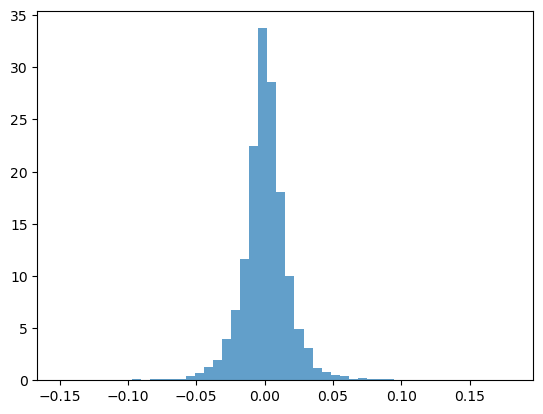

In [12]:
plt.hist(data["Returns"].dropna(), bins=50, density=True, alpha=0.7)


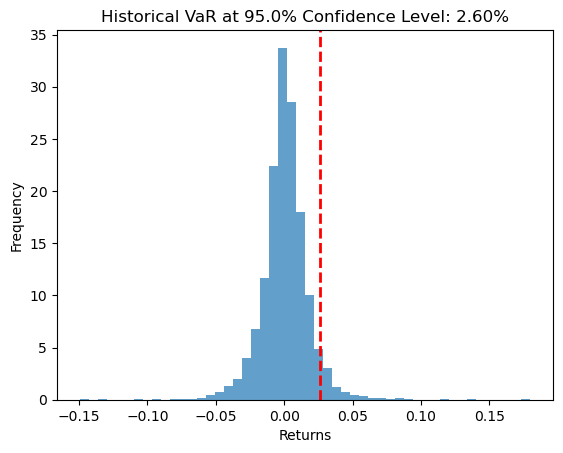

In [14]:
plt.hist(data["Returns"].dropna(), bins=50, density=True, alpha=0.7)
plt.axvline(x=var, color="red", linestyle="--", linewidth=2)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Historical VaR at {confidence_level * 100}% Confidence Level: {var:.2%}")
plt.show()

 Parametric VaR

In [15]:
mean = data["Returns"].mean()
std = data["Returns"].std()

In [16]:
var = -mean - std * np.percentile(np.random.normal(size=10000), (1 - confidence_level) * 100)

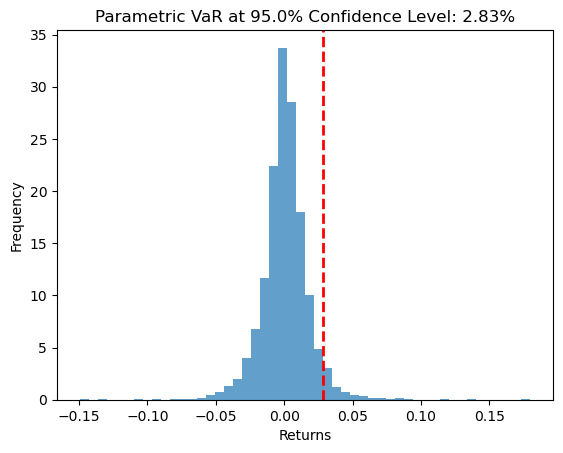

In [18]:
plt.hist(data["Returns"].dropna(), bins=50, density=True, alpha=0.7)
plt.axvline(x=var, color="red", linestyle="--", linewidth=2)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Parametric VaR at {confidence_level * 100}% Confidence Level: {var:.2%}")
plt.show()

 Comparing VaR Methods

In [20]:
historical_var = -np.percentile(data["Returns"].dropna(), (1 - confidence_level) * 100)
parametric_var = -mean - std * np.percentile(np.random.normal(size=10000), (1 - confidence_level) * 100)
print(f"Historical VaR: {historical_var:.2%}")
print(f"Parametric VaR: {parametric_var:.2%}")

Historical VaR: 2.60%
Parametric VaR: 2.83%
